# Popular Twitter Accounts

## Instructions

* In this activity, you are given an incomplete CSV file of Twitter's most popular accounts. You will use this CSV file in conjunction with Tweepy's API to create a pandas DataFrame.

* Consult the Jupyter Notebook file for instructions, but here are your tasks:

* The "PopularAccounts.csv" file has columns whose info needs to be filled in.

* Create a pandas DataFrame and import the CSV file into it.

* Call Tweepy's API to retrieve the info for the missing columns in the starter CSV.

* Export the results to a new CSV file called "PopularAccounts_New.csv"

* Calculate the averages of a user's tweets, # of followers, etc., then create a DataFrame of the averages.

In [1]:
import pandas as pd
import json
import requests as r
from twitter_keys import Consumer_Key, Consumer_API_Secret, Access_Token, Access_Token_Secret
import tweepy 
import matplotlib.pyplot as plt

In [2]:
csv_file = 'PopularAccounts_short.csv'

In [3]:
df = pd.read_csv(csv_file, dtype=str)
df

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,NaN,NaN,NaN,NaN,NaN
1,justinbieber,NaN,NaN,NaN,NaN,NaN
2,BarackObama,NaN,NaN,NaN,NaN,NaN
3,Taylorswift13,NaN,NaN,NaN,NaN,NaN
4,rihanna,NaN,NaN,NaN,NaN,NaN
5,youtube,NaN,NaN,NaN,NaN,NaN
6,theellenshow,NaN,NaN,NaN,NaN,NaN


In [4]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

public_tweets = api.home_timeline()

In [5]:
json_data = api.get_user('garyvee')
total_tweets = json_data['statuses_count']
total_followers = json_data['followers_count']
total_following = json_data['friends_count']
total_favs = json_data['favourites_count']
real_name = json_data['name'] 

print('Test User Data: ')
print('Total Tweets:' ,total_tweets)
print('Total Followers:' , total_followers)
print('Total Following: ', total_following)
print('Total Favorites: ', total_favs)
print('Real Name: ', real_name)

Test User Data: 
Total Tweets: 158792
Total Followers: 1628241
Total Following:  10073
Total Favorites:  51428
Real Name:  Gary Vaynerchuk


In [6]:
for index, row in df.iterrows():
    target_user = row['Screen Name']
    
    account_data = api.get_user(target_user)
#     print(account_data)

    total_tweets = account_data['statuses_count']
    total_followers = account_data['followers_count']
    total_following = account_data['friends_count']
    total_favs = account_data['favourites_count']
    real_name = account_data['name'] 
    
    df.set_value(index, 'Real Name', real_name)
    df.set_value(index, 'Tweets', total_tweets)
    df.set_value(index, 'Followers', total_followers)
    df.set_value(index, 'Following', total_following)
    df.set_value(index, 'Favorites Count', total_favs)

df.head()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,8786,107611532,207,5869
1,justinbieber,Justin Bieber,30647,104459813,317294,3445
2,BarackObama,Barack Obama,15486,98007812,625998,10
3,Taylorswift13,Taylor Swift,80,85811147,0,115
4,rihanna,Rihanna,10055,84448455,1124,1025


In [7]:
ave_tweets = df['Tweets'].mean()
ave_followers = df['Followers'].mean()
ave_following = df['Following'].mean()
ave_favs = df['Favorites Count'].mean()

In [8]:
ave_dict = {'average tweets': ave_tweets,
'average followers': ave_followers,
'average following': ave_following,
'average favorites': ave_favs}

In [9]:
df_ave = pd.DataFrame(ave_dict, index=['For All Users'])
df_ave

,average favorites,average followers,average following,average tweets
For All Users,1827.285714,8.964758e+07,140233.0,14585.285714


In [10]:
df.columns

Index(['Screen Name', 'Real Name', 'Tweets', 'Followers', 'Following',
       'Favorites Count'],
      dtype='object')

In [11]:
def plot_axis(c):
    tweets_total = c['Tweets']
    followers_total = c['Followers']
    following_total = c['Following']
    fav_total = c['Favorites Count']
    return tweets_total, followers_total, following_total, fav_total

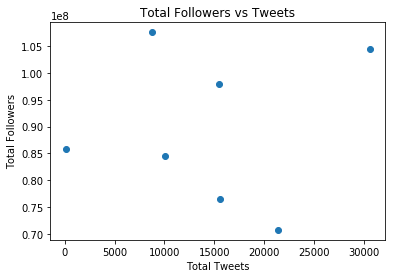

In [12]:
plt.scatter(plot_axis(df)[0], plot_axis(df)[1])
plt.xlabel('Total Tweets')
plt.ylabel('Total Followers')
plt.title('Total Followers vs Tweets')
plt.show()

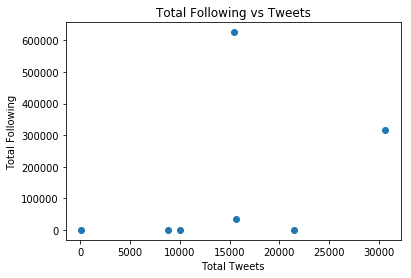

In [13]:
plt.scatter(plot_axis(df)[0], plot_axis(df)[2])
plt.xlabel('Total Tweets')
plt.ylabel('Total Following')
plt.title('Total Following vs Tweets')
plt.show()

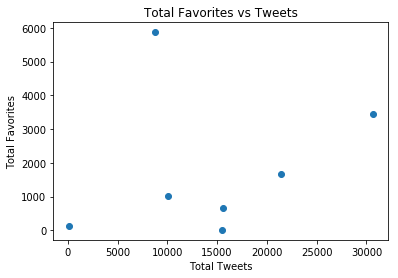

In [14]:
plt.scatter(plot_axis(df)[0], plot_axis(df)[3])
plt.xlabel('Total Tweets')
plt.ylabel('Total Favorites')
plt.title('Total Favorites vs Tweets')
plt.show()

In [15]:
df.to_csv('Twitter_User_Export.csv')